In [1]:
import pandas as pd
import re
import numpy as np

import math
import statistics

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
matplotlib.rcParams['pdf.fonttype'] = 42

%matplotlib inline

pd.set_option('display.max_columns', 10000)
pd.set_option('display.width', 10000)

In [2]:
hiroshima = pd.read_csv('data/hiroshima-cleaned.csv')
hiroshima.head(5)

,year,male,female,sex_unknown,total,accumulated_total
0,1952,31088,26798,16.0,57902,57902
1,1953,169,220,2.0,391,58293
2,1954,85,126,1.0,212,58505
3,1955,244,279,NaN,523,59028
4,1956,328,333,19.0,680,59708


In [3]:
nagasaki = pd.read_csv('data/nagasaki-cleaned.csv')
years = pd.read_csv('data/years_conversion.csv')

nagasaki.head(5)

,year_japan,male,female,total,accumulated_total
0,43,NaN,NaN,26902,26902
1,44,NaN,NaN,12649,39551
2,45,NaN,NaN,2150,41701
3,46,NaN,NaN,2035,43736
4,47,NaN,NaN,1717,45453


In [4]:
nagasaki = nagasaki.merge(years, on='year_japan')

In [5]:
deaths = hiroshima.merge(nagasaki, on='year', how='left', suffixes=('_hiroshima', '_nagasaki'))
deaths.head(3)

,year,male_hiroshima,female_hiroshima,sex_unknown,total_hiroshima,accumulated_total_hiroshima,year_japan,male_nagasaki,female_nagasaki,total_nagasaki,accumulated_total_nagasaki
0,1952,31088,26798,16.0,57902,57902,NaN,NaN,NaN,NaN,NaN
1,1953,169,220,2.0,391,58293,NaN,NaN,NaN,NaN,NaN
2,1954,85,126,1.0,212,58505,NaN,NaN,NaN,NaN,NaN


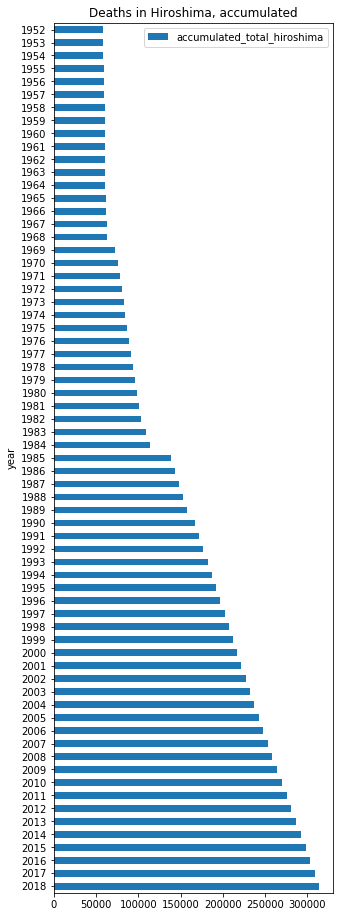

In [21]:
deaths.sort_index(ascending=False).plot(kind='barh',
           x='year',
           y='accumulated_total_hiroshima',
           title='Deaths in Hiroshima, accumulated',
           figsize=(5,16))

plt.savefig("charts/hiroshima-deaths-accumulated.pdf",  bbox_inches='tight')

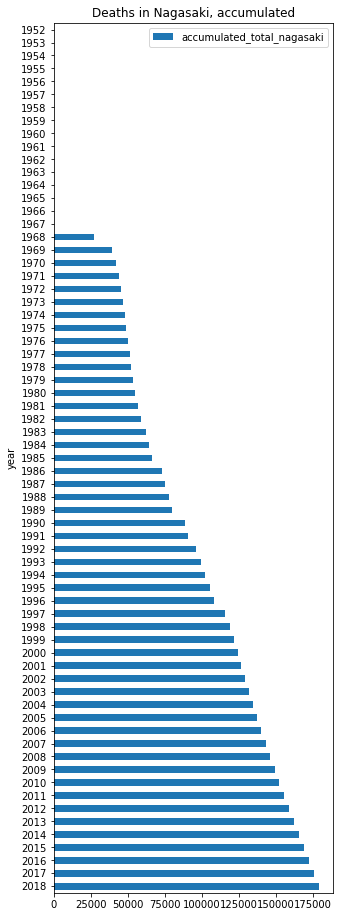

In [19]:
ax = deaths.sort_index(ascending=False).plot(kind='barh',
           x='year',
           y='accumulated_total_nagasaki',
           title='Deaths in Nagasaki, accumulated',
           figsize=(5,16))

plt.savefig("charts/nagasaki-deaths-accumulated.pdf",  bbox_inches='tight')

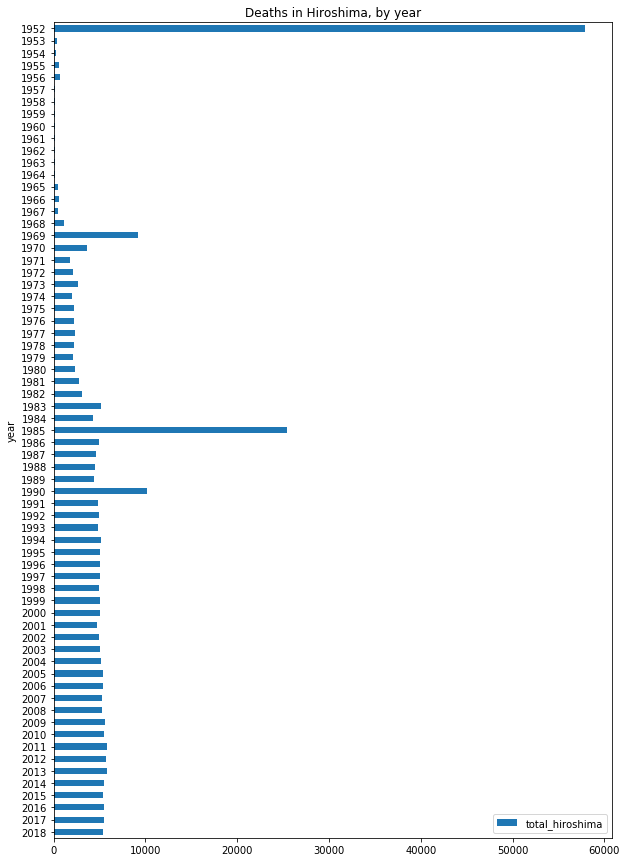

In [14]:
deaths.sort_index(ascending=False).plot(kind='barh',
           x='year',
           y='total_hiroshima',
           title='Deaths in Hiroshima, by year',
           figsize=(10,15))

plt.savefig("charts/hiroshima-deaths.pdf",  bbox_inches='tight')

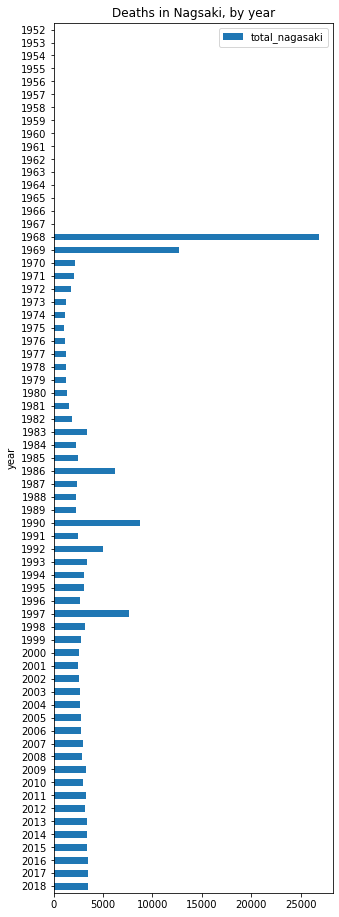

In [13]:
deaths.sort_index(ascending=False).plot(kind='barh',
           x='year',
           y='total_nagasaki',
           title='Deaths in Nagsaki, by year',
           figsize=(5,16))

plt.savefig("charts/nagasaki-deaths.pdf",  bbox_inches='tight')

## Check numbers!

In [10]:
pd.set_option("display.max_rows", 200)

deaths.set_index('year') \
    .sort_index(ascending=True) \
    .total_hiroshima.cumsum() \
    .to_frame() \
    .rename(columns={'total_hiroshima': 'cumulative_sum_hiroshima'}) \
    .merge(deaths, left_index=True, right_on='year') \
    [['cumulative_sum_hiroshima', 'accumulated_total_hiroshima', 'year']]
    #.plot(kind='bar', figsize=(10,5))

,cumulative_sum_hiroshima,accumulated_total_hiroshima,year
0,57902,57902,1952
1,58293,58293,1953
2,58505,58505,1954
3,59028,59028,1955
4,59708,59708,1956
5,59893,59893,1957
6,60066,60066,1958
7,60253,60253,1959
8,60414,60414,1960
9,60553,60553,1961


In [12]:
deaths.set_index('year') \
    .sort_index(ascending=True) \
    .total_nagasaki.cumsum() \
    .to_frame() \
    .rename(columns={'total_nagasaki': 'cumulative_sum_nagasaki'}) \
    .merge(deaths, left_index=True, right_on='year') \
    [['cumulative_sum_nagasaki', 'accumulated_total_nagasaki', 'year']]
    #.plot(kind='bar', figsize=(10,5))

,cumulative_sum_nagasaki,accumulated_total_nagasaki,year
0,NaN,NaN,1952
1,NaN,NaN,1953
2,NaN,NaN,1954
3,NaN,NaN,1955
4,NaN,NaN,1956
5,NaN,NaN,1957
6,NaN,NaN,1958
7,NaN,NaN,1959
8,NaN,NaN,1960
9,NaN,NaN,1961
